# KNN Algorithm
- Supervised learning algorithm used for classification,regression and missing value treatment.
- Value of k is found by plotting error curve. Business knowledge is also important in identifying optimum value of k.
- Dimensionality reduction and feature scaling is important before applying the knn algorithm as it takes all data points to memory and calculate the least distant data point.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:
df = make_classification(n_samples=200,n_features=8,n_classes=2)
X=pd.DataFrame(df[0])
y=pd.DataFrame(df[1])

In [16]:
X.shape

(200, 8)

In [17]:
X.head()

,0,1,2,3,4,5,6,7
0,-1.570074,0.637005,0.966646,-0.474765,-0.383831,2.330694,0.789342,0.655104
1,0.947345,-0.725306,-0.249800,0.976627,-1.012006,-1.193062,-1.625360,-0.855667
2,-1.042299,0.983167,0.093749,0.277567,-1.634155,1.196849,-1.980318,0.395529
3,-0.631964,2.231329,-1.542398,0.650561,1.044398,-0.296948,-0.979894,-0.439358
4,0.295530,-0.446902,0.137858,-0.394072,-0.428941,-0.234202,0.192120,-0.443188


In [18]:
y.shape

(200, 1)

In [30]:
# split data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)


In [31]:
#scale data before training

scaler =  StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test  = pd.DataFrame(scaler.transform(X_test))

In [42]:
y_train=(np.asarray(y_train)).reshape(X_train.shape[0])


In [46]:
y_test =(np.asarray(y_test)).reshape(X_test.shape[0])

In [47]:
# Find optimum value of k
error1= []
error2= []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_pred = knn.predict(X_train)
    error1.append(np.mean(y_train!=train_pred))
    test_pred = knn.predict(X_test)
    error2.append(np.mean(y_test!=test_pred))





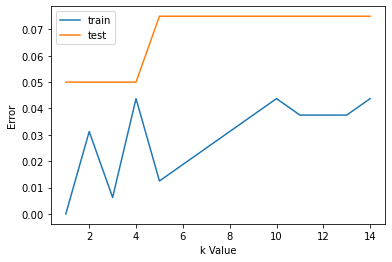

In [48]:
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


We will choose k value as 5 as after value of 5 error is increasing

In [49]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.925